The finding of adequate hyper parameters is crucial to improve the performance and generalization of machine learning models. There are several methods described in modern literature that can help to find the best fitting hyper parameters. The performance is tested in different dataset that are tested and well studied, such as MINST. Hyper parameters (HP) are external to the learning process but significantly impact model performance. HP are external to the learning process but significantly impact model performance. Effective tuning typically requires domain expertise or computationally expensive methods like brute-force search.
Effective tuning typically requires domain expertise or computationally expensive methods like brute-force search In [1, 2, 3], the Bayesian optimization is explored.  Bayesian optimization leverages prior knowledge to update posterior distributions based on sample data, guiding the search for optimal hyperparameter configurations efficiently. Traditional approaches like grid search and random search are computationally expensive and less effective in high-dimensional spaces. Bayesian optimization offers a more efficient alternative, particularly for expensive, black-box objective functions. 
In [1] the use of Bayesian optimization is explored for tuning hyper parameters in machine learning models, which is critical for improving model performance. The study proposes a method using Bayesian optimization with Gaussian processes. Traditional approaches like grid search and random search are computationally expensive and less effective in high-dimensional spaces. Bayesian optimization offers a more efficient alternative, particularly for expensive, black-box objective functions. The results were conducted on machine learning models like random forests, neural networks (CNN and RNN), and deep forests (gcForest). Bayesian optimization demonstrated significant improvements in prediction accuracy and computational efficiency compared to traditional methods.The results confirm that Bayesian optimization outperforms other optimization techniques in terms of speed and achieving better model performance, especially in scenarios with limited computational resources or high-dimensional hyperparameter spaces.

In [2] it is stated that complex models like Deep Belief Networks (DBNs) have numerous hyper parameters, making manual optimization inefficient and inconsistent.
The difficulty in tuning these models hinders reproducibility and progress in machine learning research. Therefore, the proposed approaches is based on
Random Search, a method where hyper parameters are sampled randomly from predefined distributions. It is efficient for simple problems but struggles with complex models like DBNs. In order to improve this disadvantage, the Sequential Model-Based Optimization is introduced.
This method approximates the loss function with a surrogate model to guide the search. Two specific variants of the methods are explained: Gaussian Process and the
Tree-Structured Parzen Estimator. Both methods were tested on DBNs with up to 32 hyper parameters across tasks like image classification on datasets such as MNIST and MRBI. The results show, that Random search matched human manual optimization for simple tasks but failed for harder datasets.
Tree-Structured Parzen Estimator consistently outperformed both random search and manual tuning, achieving better accuracy and efficiency.The Gaussian Process was effective but less efficient than TPE due to computational overhead.

In [3], the results proves that experiments were conducted on machine learning models like random forests, neural networks (CNN and RNN), and deep forests (gcForest). Bayesian optimization demonstrated significant improvements in prediction accuracy and computational efficiency compared to traditional methods.
The results confirm that Bayesian optimization outperforms other optimization techniques in terms of speed and achieving better model performance, especially in scenarios with limited computational resources or high-dimensional hyperparameter spaces.





[1] Hyunghun Cho et al.: *Basic Enhancement Strategies When Using Bayesian Optimization for Hyperparameter Tuning of Deep Neural Networks*, Special section on scalable deeo learning for big data, VOLUME 8, Digital Object Identifier 10.1109/ACCESS.2020.2981072, pp. 52588-52608 IEEE Access, 2020

[2] James Bergstra et al: *Algorithms for Hyper-Parameter Optimization*, NIPS'11: Proceedings of the 24th International Conference on Neural Information Processing Systems,  pp. 2546 - 2554, 2011

[3] Jia Wu et al: *Hyperparameter Optimization for Machine Learning Models Based on Bayesian Optimization*, Journal of Electronic Science , VOL. 17, NO. 1,Digital Object Identifier:10.11989/JEST.1674-862X.80904120, pp.26 - 40, 2019, 

## Preparation of data and environment and Import MINST dataset 
In this example, the MINST data set is used to apply the Bayesian Optimization for the hyper parameters of a neuronal network NN.\
The library *tensorflow* is used to define the NN. *Tensorflow* contains the data set MNIST which contains a grau scaled hand written numbers 0 to 9. All images are taged and therefore a supervised train strategy can be applied.\\
Addtionally, the library *GPyOpt* is imported to optimize the hyper parameters using the *Gaussian Process*. GPyOpt is a Python library for Bayesian Optimization using Gaussian Processes (GPs). It is designed to help with optimizing expensive-to-evaluate functions, especially those that are non-convex, noisy, or black-box (where the internal function mechanism is unknown). The library leverages GPs to model the objective function and provides efficient methods to explore the search space.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## necessary libraries to build model tensorflow (objective funciton)
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import GPyOpt


## Load and prepare the dataset


In [3]:
# Load MNIST dataset
# Split into training and testing datasets
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255


Since the output is a categoial varibalbe the the method One-Shot- is applied with ten classes, each for every number between 0 and 9.

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes = 10)

https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html\
https://scikit-optimize.github.io/stable/auto_examples/bayesian-optimization.html#sphx-glr-auto-examples-bayesian-optimization-py\
https://www.linkedin.com/pulse/optimizing-machine-learning-models-bayesian-deep-dive-davis-joseph-qsqje?utm_source=share&utm_medium=member_android&utm_campaign=share_via


In [5]:
print(X_val.shape)

(10000, 28, 28)


In [6]:
# define the model as objective function()
def build_model(learning_rate, units_layer01,units_layer02, l2_reg):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(units=units_layer01, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dense(units=units_layer02, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dense(units=10, activation='softmax'))
    return model

In [7]:
def model_score(params):
    learning_rate = float(params[:, 0])
    units_layer01 = int(params[:, 1])
    units_layer02 = int(params[:, 2])
    l2_reg = float(params[:, 3])
    batch_size = int(params[:, 4])

    model = build_model(learning_rate, units_layer01,units_layer02,  l2_reg)
    #model.summary()
    checkpoint_folder = "checkpoints/"
    checkpoint_path = checkpoint_folder +  f'checkpoint_lr_{learning_rate}_units_layer01_{units_layer01}_units_layer02_{units_layer02}_l2_{l2_reg}_batch_{batch_size}.keras' #h5
    callbacks = [
        EarlyStopping(monitor='val_mse', patience=15, restore_best_weights=True),
        ModelCheckpoint(checkpoint_path, monitor='val_mse', save_best_only=True, verbose=1)
    ]
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['mse'])
    
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        batch_size=batch_size,
                        epochs=50,
                        callbacks=callbacks,
                        verbose=0)
    
    val_mse = np.max(history.history['val_mse'])
    return -val_mse


(60000, 28, 28)


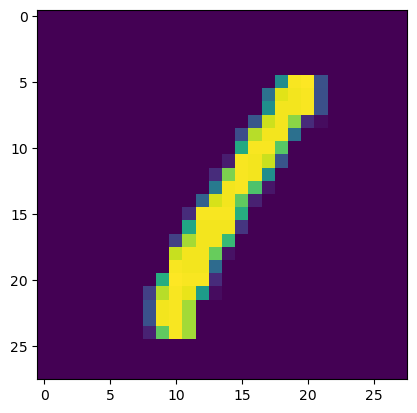

y_train category [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


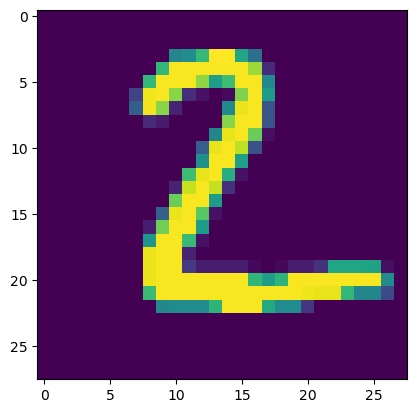

y_val category: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
import matplotlib.pyplot as plt
m = X_train.shape
print(m)
plt.imshow(X_train[3])
plt.show()
print("y_train category", y_train[3])
plt.imshow(X_val[1])
plt.show()
print("y_val category:", y_val[1])


In [9]:
# Define the bounds of the hyperparameters
bounds = [
    {'name': 'learning_rate', 'type': 'continuous', 'domain': (1e-5, 1e-1)},
    {'name': 'units_layer01', 'type': 'discrete', 'domain': (16, 32, 64, 128, 256)},
    {'name': 'units_layer02', 'type': 'discrete', 'domain': (16, 32, 64, 128, 256)},
    {'name': 'l2_reg', 'type': 'continuous', 'domain': (1e-6, 1e-2)},
    {'name': 'batch_size', 'type': 'discrete', 'domain': (16, 32, 64, 128)}
]

# Perform Bayesian Optimization
optimizer = GPyOpt.methods.BayesianOptimization(f=model_score, 
                                                domain=bounds, 
                                                acquisition_type='EI'  # Expected Improvement
)
#optimizer.run_optimization(max_iter=30, verbosity=True, eps=1e-6)



Epoch 1: val_mse improved from inf to 0.06577, saving model to checkpoints/checkpoint_lr_0.08248804698799944_units_layer01_16_units_layer02_128_l2_0.004321448526977485_batch_32.keras

Epoch 2: val_mse improved from 0.06577 to 0.05595, saving model to checkpoints/checkpoint_lr_0.08248804698799944_units_layer01_16_units_layer02_128_l2_0.004321448526977485_batch_32.keras

Epoch 3: val_mse did not improve from 0.05595

Epoch 4: val_mse did not improve from 0.05595

Epoch 5: val_mse improved from 0.05595 to 0.05402, saving model to checkpoints/checkpoint_lr_0.08248804698799944_units_layer01_16_units_layer02_128_l2_0.004321448526977485_batch_32.keras

Epoch 6: val_mse did not improve from 0.05402

Epoch 7: val_mse did not improve from 0.05402

Epoch 8: val_mse did not improve from 0.05402

Epoch 9: val_mse did not improve from 0.05402

Epoch 10: val_mse did not improve from 0.05402

Epoch 11: val_mse did not improve from 0.05402

Epoch 12: val_mse did not improve from 0.05402

Epoch 13: val

In [10]:
optimizer.run_optimization(max_iter=30, verbosity=True, eps=1e-6)


Epoch 1: val_mse improved from inf to 0.05768, saving model to checkpoints/checkpoint_lr_0.08083372797150624_units_layer01_32_units_layer02_64_l2_0.006789195229577_batch_32.keras

Epoch 2: val_mse did not improve from 0.05768

Epoch 3: val_mse did not improve from 0.05768

Epoch 4: val_mse did not improve from 0.05768

Epoch 5: val_mse did not improve from 0.05768

Epoch 6: val_mse improved from 0.05768 to 0.05185, saving model to checkpoints/checkpoint_lr_0.08083372797150624_units_layer01_32_units_layer02_64_l2_0.006789195229577_batch_32.keras

Epoch 7: val_mse did not improve from 0.05185

Epoch 8: val_mse did not improve from 0.05185

Epoch 9: val_mse did not improve from 0.05185

Epoch 10: val_mse did not improve from 0.05185

Epoch 11: val_mse did not improve from 0.05185

Epoch 12: val_mse did not improve from 0.05185

Epoch 13: val_mse did not improve from 0.05185

Epoch 14: val_mse improved from 0.05185 to 0.04995, saving model to checkpoints/checkpoint_lr_0.08083372797150624_

35


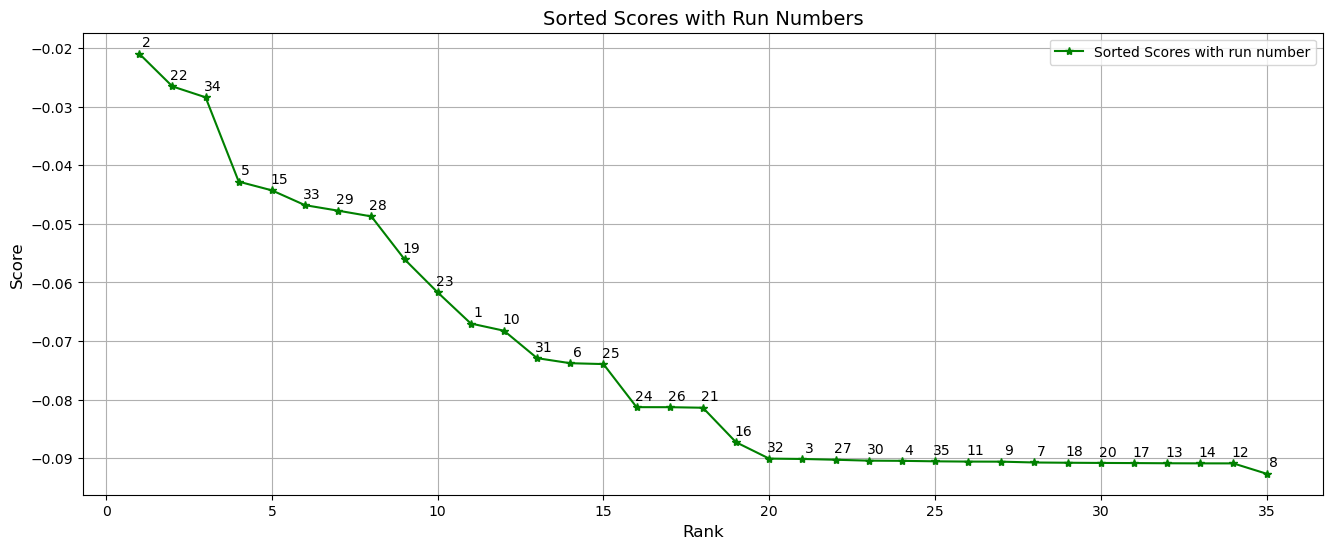

In [12]:
# Assuming optimizer.X and optimizer.Y are already defined
opt_res_param = optimizer.X
print(len(opt_res_param))
opt_res_score = optimizer.Y
opt_res_score = opt_res_score.flatten()

# Sort scores and retain original indices
original_indices = np.argsort(opt_res_score)[::-1]  # Indices for descending order
opt_res_score_sorted = opt_res_score[original_indices]

# Create N array (1 to len(opt_res_score_sorted))
N = np.arange(1, len(opt_res_score_sorted) + 1)

# Set up the figure size
plt.figure(figsize=(16, 6))  # Width: 10 inches, Height: 6 inches

# Plot scores
plt.plot(N, opt_res_score_sorted, 'g*-', label="Sorted Scores with run number")  # Add a label for the legend
plt.grid()

# Annotate with original run numbers
for i, idx in enumerate(original_indices):
    plt.annotate(f"{idx+1}", (N[i], opt_res_score_sorted[i]), textcoords="offset points", xytext=(5, 5), ha='center')

# Add labels, title, and legend
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Sorted Scores with Run Numbers", fontsize=14)
plt.legend(loc="upper right", fontsize=10)  # Add a legend at the top right

# Show the plot
plt.show()
